In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


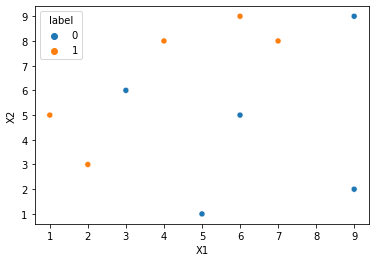

In [5]:
import seaborn as sns
sns.scatterplot(x = df['X1'],y = df['X2'], hue = df['label'])

In [6]:
df['weights'] = 1/df.shape[0]

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1 = DecisionTreeClassifier(max_depth = 1)


In [10]:
x = df.iloc[:, 0:2].values
y = df.iloc[:,2].values

In [11]:
# STEP 2 Train 1st Model

In [12]:
dt1.fit(x,y)


DecisionTreeClassifier(max_depth=1)

In [13]:
DecisionTreeClassifier(ccp_alpha = 0.0, class_weight = None, criterion = 'gini',
                       max_depth = 1, max_features = None, max_leaf_nodes= None,
                       min_samples_leaf= 1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

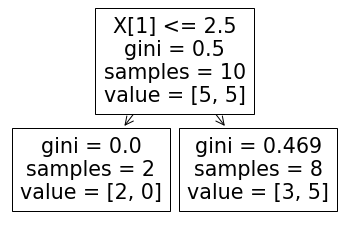

In [14]:
from sklearn.tree import plot_tree
plot_tree(dt1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


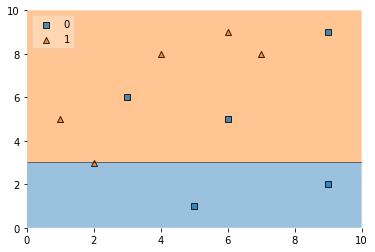

In [15]:
plot_decision_regions(x, y, clf = dt1, legend= 2)

In [16]:
df['y_pred'] = dt1.predict(x)

In [17]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [18]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/(error))

In [19]:
# Step 3 To Calculate model Weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [20]:
#Step 4 Update Weight
def update_row_weight(row, alpha = 0.423):
  if row ['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [21]:
df['update_weights'] = df.apply(update_row_weight, axis= 1)

In [22]:
df

,X1,X2,label,weights,y_pred,update_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [23]:
 df['update_weights'].sum()

0.9165153319682015

In [24]:
df['normalized_weights'] = df['update_weights']/df['update_weights'].sum()

In [25]:
df

,X1,X2,label,weights,y_pred,update_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [26]:
df['normalized_weights'].sum()

1.0

In [27]:
df['sum_upper'] = np.cumsum(df['normalized_weights'])

In [28]:
df['sum_lower'] = df['sum_upper'] - df['normalized_weights']

In [29]:
df[['X1', 'X2', 'label', 'weights', 'y_pred', 'update_weights', 'sum_lower', 'sum_upper' ]]
df

,X1,X2,label,weights,y_pred,update_weights,normalized_weights,sum_upper,sum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [30]:
def create_new_database(df):
  indices = []
  for i in range(df.shape[0]):
    a = np.random.random()
    for index, row in df.iterrows():
        if row['sum_upper'] > a and a>row['sum_lower']:
          indices.append(index)
  return indices

In [31]:
index_values = create_new_database(df)
index_values

[6, 3, 7, 9, 3, 0, 2, 7, 0, 2]

In [32]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
6,6,5,0,0.1
3,4,8,1,0.1
7,7,8,1,0.1
9,9,2,0,0.1
3,4,8,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1


In [33]:
dt2 = DecisionTreeClassifier(max_depth = 1)

In [34]:
x = second_df.iloc[:,0:2].values
y = second_df.iloc[:, 2].values

In [35]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

In [36]:
DecisionTreeClassifier(ccp_alpha = 0.0, class_weight = None, criterion = 'gini',
                       max_depth = 1, max_features = None, max_leaf_nodes= None,
                       min_samples_leaf= 1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

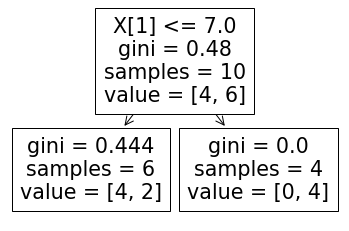

In [37]:
plot_tree(dt2)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


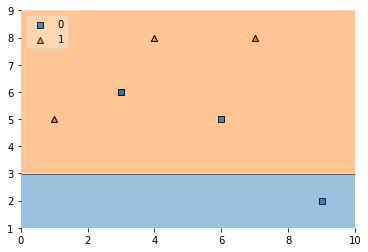

In [38]:
plot_decision_regions(x, y, clf=dt1, legend=2)

In [39]:
second_df['y_pred'] = dt2.predict(x)

In [40]:
second_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
3,4,8,1,0.1,1
7,7,8,1,0.1,1
9,9,2,0,0.1,0
3,4,8,1,0.1,1
0,1,5,1,0.1,0
2,3,6,0,0.1,0
7,7,8,1,0.1,1
0,1,5,1,0.1,0
2,3,6,0,0.1,0


In [41]:
alpha2  = calculate_model_weight(0.2)

In [42]:
alpha2 

0.6931471805599453

In [43]:
# step 4 update Weight

In [51]:
def update_row_weights(row, alpha = 0.69):
  if row ['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [52]:
second_df['update_weights'] = second_df.apply(update_row_weights,axis=1)

In [53]:
second_df

,X1,X2,label,weights,y_pred,update_weights
6,6,5,0,0.1,0,0.050158
3,4,8,1,0.1,1,0.050158
7,7,8,1,0.1,1,0.050158
9,9,2,0,0.1,0,0.050158
3,4,8,1,0.1,1,0.050158
0,1,5,1,0.1,0,0.199372
2,3,6,0,0.1,0,0.050158
7,7,8,1,0.1,1,0.050158
0,1,5,1,0.1,0,0.199372
2,3,6,0,0.1,0,0.050158


In [55]:
second_df['nomalized_weights'] = second_df['update_weights']/second_df['update_weights'].sum()

In [56]:
second_df

,X1,X2,label,weights,y_pred,update_weights,nomalized_weights
6,6,5,0,0.1,0,0.050158,0.062697
3,4,8,1,0.1,1,0.050158,0.062697
7,7,8,1,0.1,1,0.050158,0.062697
9,9,2,0,0.1,0,0.050158,0.062697
3,4,8,1,0.1,1,0.050158,0.062697
0,1,5,1,0.1,0,0.199372,0.249213
2,3,6,0,0.1,0,0.050158,0.062697
7,7,8,1,0.1,1,0.050158,0.062697
0,1,5,1,0.1,0,0.199372,0.249213
2,3,6,0,0.1,0,0.050158,0.062697


In [57]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [63]:
second_df['sum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [64]:
second_df['sum_lower'] = second_df['sum_upper'] - second_df['nomalized_weights']

In [65]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','sum_lower','sum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,sum_lower,sum_upper
6,6,5,0,0.1,0,0.062697,0.000000,0.062697
3,4,8,1,0.1,1,0.062697,0.062697,0.125393
7,7,8,1,0.1,1,0.062697,0.125393,0.188090
9,9,2,0,0.1,0,0.062697,0.188090,0.250787
3,4,8,1,0.1,1,0.062697,0.250787,0.313483
0,1,5,1,0.1,0,0.249213,0.313483,0.562697
2,3,6,0,0.1,0,0.062697,0.562697,0.625393
7,7,8,1,0.1,1,0.062697,0.625393,0.688090
0,1,5,1,0.1,0,0.249213,0.688090,0.937303
2,3,6,0,0.1,0,0.062697,0.937303,1.000000


In [66]:
index_values = create_new_database(second_df)

In [67]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [68]:
third_df

,X1,X2,label,weights
7,7,8,1,0.1
9,9,2,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
7,7,8,1,0.1


In [69]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


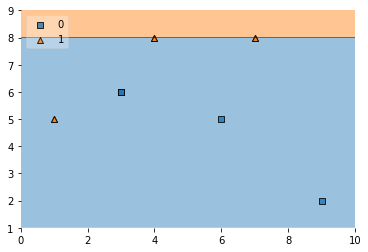

In [70]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [71]:
third_df['y_pred'] = dt3.predict(X)

In [72]:
third_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,0
9,9,2,0,0.1,1
2,3,6,0,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,1
6,6,5,0,0.1,0
7,7,8,1,0.1,0


In [73]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [74]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.6931471805599453 -0.4236489301936017


# Prediction

In [75]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [76]:
dt2.predict(query)

array([0])

In [77]:
dt3.predict(query)

array([0])

In [78]:
alpha1*1 + alpha2*(1) + alpha3*(1)

0.6931471805599454

In [79]:
np.sign(1.09)

1.0

In [80]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [81]:
dt2.predict(query)

array([1])

In [82]:
dt3.predict(query)

array([1])

In [83]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

0.15415067982725827

In [84]:
np.sign(-0.25)

-1.0